In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
import pandas as pd

# values = np.fromfile('value1.bin', dtype=np.int16)
values = np.fromfile('value_3V_5.bin', dtype=np.int16)
values = np.loadtxt('value_3V_5.csv', delimiter=',').flatten()
values = values[:1000]
values = values*3.3/2**12
values=values-np.mean(values)

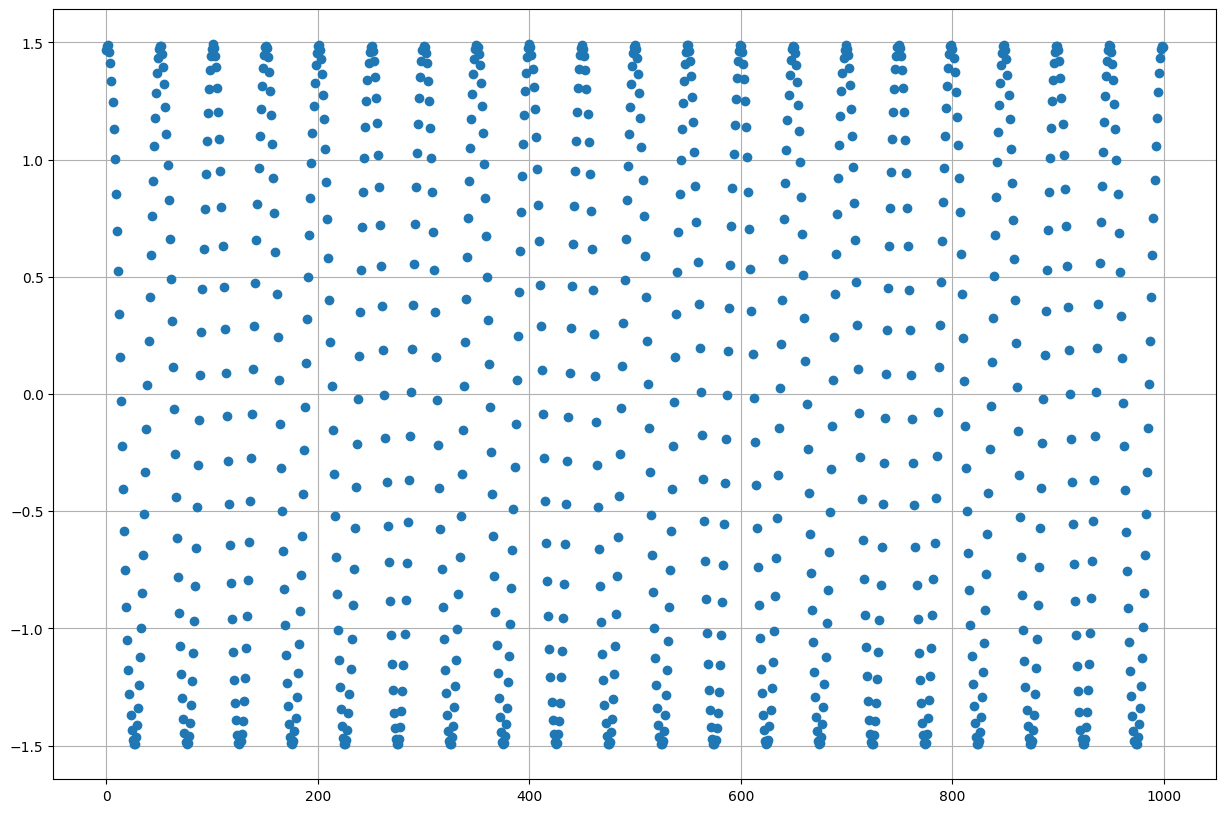

In [22]:
plt.figure(figsize=(15,10))
plt.plot(values,'o')
plt.grid()

Max value : 1.4945930419921873 = 3.4904591217452747 dB
Max value H : 3.5501858414139527 , Max value R 3.4964177777985372 dB


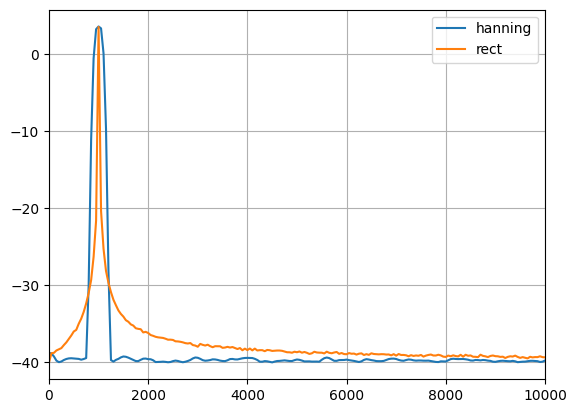

In [40]:

Te=1/50000
def plotit(W,l):
    N=len(values)
    ffts=np.fft.fft(values*W)*(2/(N*np.mean(W)))
    f=np.fft.fftfreq(N, Te)
    ffts=np.fft.fftshift(ffts)
    f=np.fft.fftshift(f)
    fftlg=20*np.log10(np.abs(ffts)+1e-2)
    plt.plot(f,fftlg, label=l)
    return np.max(fftlg)

N=len(values)
# W=np.hamming(N)
W = sp.signal.windows.flattop(N)
mxh=plotit(W,'hanning')
W=np.ones(N)
mxr=plotit(W,'rect')

mx=np.max(values)

print(f"Max value : {mx} = {20*np.log10(mx)} dB")
print(f"Max value H : {mxh} , Max value R {mxr} dB")
plt.xlim(0, 10000)
plt.grid()
plt.legend()
plt.show()

## Adjusted signal frequency

In [ ]:
1/Te/N*20

976.5624999999999

Max value H : 3.5494  dB (175.5) ppm
Max value H : 3.5487  dB (94.7) ppm
Max value H : 3.5472  dB (-70.7) ppm
Max value H : 3.5502  dB (270.5) ppm


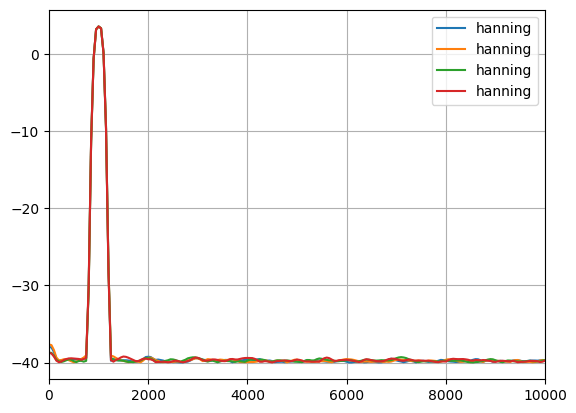

In [44]:
fichiers=['value_3V_5.bin','value_3V_6.bin','value_3V_7.bin','value_3V_8.bin']
for f in fichiers:
    values = np.fromfile(f, dtype=np.int16)
    values = values[:1000]
    values = values*3.3/2**12
    values=values-np.mean(values)
    # W=np.ones(N)
    W = sp.signal.windows.flattop(N)
    mxh=plotit(W,'hanning')
    print(f"Max value H : {mxh:.4f}  dB ({(10**(mxh/20)/1.5-1.003)*1e6:.1f}) ppm")

plt.xlim(0, 10000)
plt.grid()
plt.legend()
plt.show()    

C:\Users\marc.nicoller\AppData\Local\Temp\ipykernel_21040\484786739.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


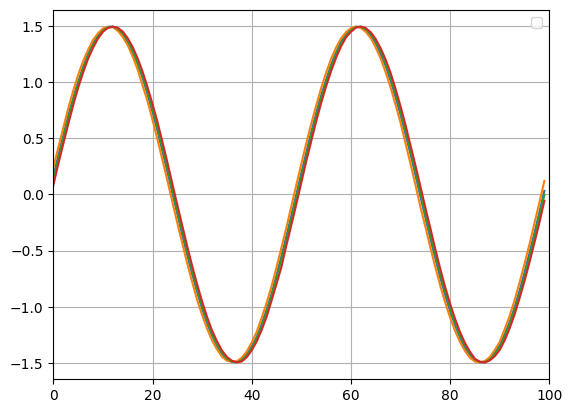

In [37]:
fichiers=['value_3V_5.bin','value_3V_6.bin','value_3V_7.bin','value_3V_8.bin']
for f in fichiers:
    values = np.fromfile(f, dtype=np.int16)
    values = values[:1000]
    values = values*3.3/2**12
    values=values-np.mean(values)
    plt.plot(values[:100] )

plt.xlim(0, 100)
plt.grid()
plt.legend()
plt.show()    